In [ ]:
from google.colab import files
uploaded = files.upload()


Saving DATASET CYBERBULLYING TWITTER.xlsx to DATASET CYBERBULLYING TWITTER.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel("DATASET CYBERBULLYING TWITTER.xlsx")
df = df.rename(columns={'Komentar': 'teks', 'Kategori': 'label'})
df['label'] = df['label'].map({'Bullying': 1, 'Non-bullying': 0})
df = df[['teks', 'label']]  # ambil hanya kolom yang dibutuhkan
df.head()


,teks,label
0,"""Makin jelek aja anaknya, padahal ibu ayahnya ...",1
1,"""Jijik astagah sok bat cakep njs""",1
2,"""Kaya tulus ya mukanya klo diliat2""",0
3,"""Jadi diri sendiri, jangan jadi ular apalagi d...",1
4,"""Aduuh.. terlalu halu.. hhahaha lebay editan n...",1


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 16.7 MB/s eta 0:00:00


In [ ]:
import re
import string
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stopword dan stemmer
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()
stemmer = StemmerFactory().create_stemmer()

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # hapus URL
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)  # hapus karakter non-alfabet
    text = ' '.join([word for word in text.split() if word not in stopwords])  # hapus stopword
    text = stemmer.stem(text)  # stemming
    return text

# Terapkan ke kolom teks
df['clean_teks'] = df['teks'].apply(clean_text)

# Cek hasil
df[['teks', 'clean_teks']].head()


,teks,clean_teks
0,"""Makin jelek aja anaknya, padahal ibu ayahnya ...",makin jelek aja anak padahal ibu ayah cakep
1,"""Jijik astagah sok bat cakep njs""",jijik astagah sok bat cakep njs
2,"""Kaya tulus ya mukanya klo diliat2""",kaya tulus muka klo liat
3,"""Jadi diri sendiri, jangan jadi ular apalagi d...",jadi diri sendiri jangan jadi ular dugong
4,"""Aduuh.. terlalu halu.. hhahaha lebay editan n...",aduuh terlalu halu hhahaha lebay edit nyaa lem...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_teks']).toarray()
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)
svm_balanced = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

models = {
    "Random Forest": rf_model,
    #"SVM (RBF Kernel)": svm_rbf,
    #"SVM (Polynomial Kernel)": svm_poly,
    "SVM (Linear Balanced)": svm_balanced,
    "Logistic Regression": lr_model
}

# Evaluasi semua model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n===== {name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))




===== Random Forest =====
Accuracy: 0.8307692307692308
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        64
           1       0.85      0.80      0.83        66

    accuracy                           0.83       130
   macro avg       0.83      0.83      0.83       130
weighted avg       0.83      0.83      0.83       130


===== SVM (Linear Balanced) =====
Accuracy: 0.823076923076923
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        64
           1       0.84      0.80      0.82        66

    accuracy                           0.82       130
   macro avg       0.82      0.82      0.82       130
weighted avg       0.82      0.82      0.82       130


===== Logistic Regression =====
Accuracy: 0.823076923076923
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.8

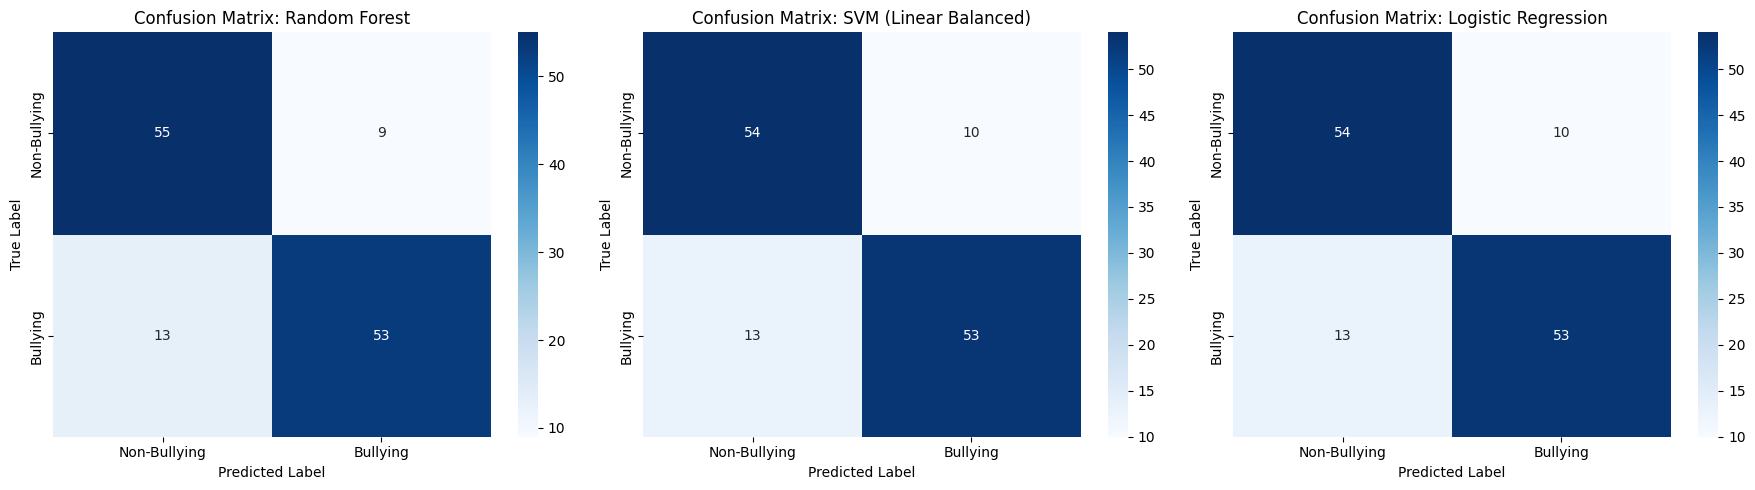

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Daftar model dan nama-namanya
models = [
    (rf_model, "Random Forest"),
    (svm_balanced, "SVM (Linear Balanced)"),
    (lr_model, "Logistic Regression")
]

# Buat subplot 1 baris 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # (rows, columns)

# Plot masing-masing confusion matrix
for ax, (model, title) in zip(axes, models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bullying', 'Bullying'],
                yticklabels=['Non-Bullying', 'Bullying'],
                ax=ax)

    ax.set_title(f'Confusion Matrix: {title}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()


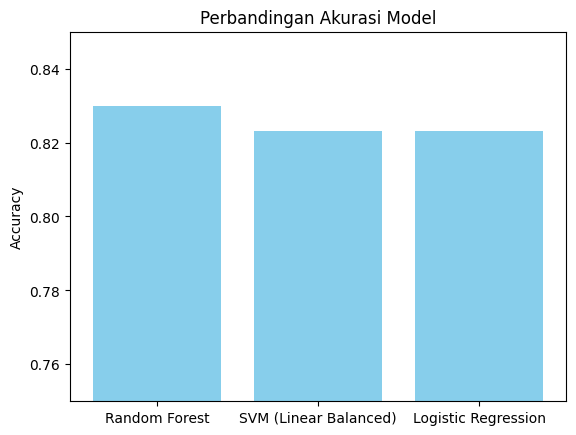

In [ ]:
import numpy as np

model_names = ['Random Forest', 'SVM (Linear Balanced)', 'Logistic Regression']
accuracies = [0.83, 0.823, 0.823]  # masukkan hasil akurasi kamu

plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0.75, 0.85)
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model')
plt.show()
